# EXERCÍCIO N.1: Sistemas de Múltiplos Classificadores

# 1)

Selecione cinco bases de dados públicas que contenham características diferentes e, para cada base, calcule o Oracle no conjunto de teste para:
* Bagging
* Adaboost 
* Random Subspace (50%)
* Random Oracles

variando o número de classificadores-base {10, 20, …, 100}. 

Use o Perceptron como classificador-base e divida os fold usando o 5-fold cross-validation. 

Analise os resultados. 



### Remover o bootstrap do Random Subspace

### Dados

1. Breast Cancer Wisconsin (Diagnostic) Data Set: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

2. banknote authentication Data Set: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

3. Connectionist Bench (Sonar) Data set: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29

4. Climate Model Simulation Crashes Data Set: https://archive.ics.uci.edu/ml/datasets/climate+model+simulation+crashes

5. Fertility Data Set: https://archive.ics.uci.edu/ml/datasets/Fertility



In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier # servirá para o Bagging e para o Random Subspace
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaseEnsemble
from rlo import RLO

import oracle

In [2]:
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings(action='ignore')

In [3]:
# seed
np.random.seed(111)
n_classificadores = np.arange(10, 110, 10)

#### Implementação do RLO 

In [4]:
# ## Base de dados para teste
# data = load_breast_cancer()
# X = data.data
# y = data.target
# # split the data into training and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# # Scale the variables to have 0 mean and unit variance
# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_test = scalar.transform(X_test)


# # # Split the data into training and DSEL for DS techniques
# # X_train, X_dsel, y_train, y_dsel = train_test_split(X_train, y_train, test_size=0.5)

#### Testando o RLO

In [5]:
# cls_base = Perceptron()
# rlo = RLO(base_estimator=cls_base, n_estimators=3)

# # treinar
# rlo.fit(X_train, y_train)

# # testar 
# predictions, pred_ens, erro = rlo.predict(X_test, y_test)

In [6]:
# erro_rlo = np.mean(pred_ens == y_test)
# print(erro_rlo)

In [7]:
# # Oracle
# # pred_oracle = np.any((predictions == y_dsel.reshape(-1,1)), axis=1)
# # acc_oracle = pred_oracle.sum()/pred_oracle.shape[0]
# # print(f'acc Oracle: {acc_oracle}')
# pred_oracle = rlo.Oracle_predict(X_test, y_test)
# acc_oracle = rlo.Oracle_score(X_test, y_test)

In [8]:
# print(f'Oracle Accuracy: {acc_oracle}')

#### função que faz a Validação cruzada 5fold com o RLO
#### função avalia_L_modelos para o RLO 

In [9]:
# Criando os 5 folds e salvando em dicionário
def cria_folds(X, y, n=5, stratified=True):
    if stratified:
        kf = StratifiedKFold(n_splits=n)
    else:
        kf = KFold(n_splits=n)
        
    kfolds = dict()
    i = 1
    for train_index, test_index in kf.split(X, y):
        kfolds[f'fold{i}'] = (train_index, test_index)
        i += 1
    return kfolds

In [10]:
# # criando os 5-folds
# kfolds = cria_folds(X_train,y_train,n=5)

In [11]:
## função cv RLO
def cv_RLO(kfolds, RLO, X, y):
    '''
    Realiza a validação cruzada para um Random Linear Oracle.
    
    Retorna uma tupla com dois dicionários: modelos e resultados.
    '''
    modelos = dict.fromkeys(kfolds)
    resultados = dict.fromkeys(kfolds)
    
    for fold, (train_idx, test_idx) in kfolds.items():
        modelo = RLO
        _,_ = modelo.fit(X[train_idx], y[train_idx])
        modelos[fold] = modelo
        resultados[fold] = modelo.predict(X[train_idx], y[train_idx])
        
    return (modelos, resultados)
    

## função avalia_L_modelos_RLO
def avalia_cv_RLO(kfolds, modelos_cv, X, y):
    '''
    Realiza a avaliação dos resultados para os dados de teste para o Random Linear Oracle e computa o Oracle para o conjunto de teste
    
    Retorna uma tupla com dois dicionários: resultados, oracles
    '''
    
    resultados = dict.fromkeys(modelos_cv)
    oracles = dict.fromkeys(modelos_cv)
    for fold, (_, test_idx) in kfolds.items():
        resultados[fold] = modelos_cv[fold].predict(X[test_idx], y[test_idx])
        
        oracles[fold] = modelos_cv[fold].Oracle_score(X[test_idx], y[test_idx])
    return (resultados, oracles)

In [12]:
# modelos_cv, resultados_treinamento_cv = cv_RLO(kfolds, RLO(base_estimator=Perceptron()), X_train, y_train)
# # modelos_cv, resultados_treinamento_cv = cv_RLO(kfolds, RLO(base_estimator=Perceptron(max_iter=10)), X_train, y_train)
# resultados_teste_cv, oracles_cv = avalia_cv_RLO(kfolds, modelos_cv, X_train, y_train)

# # modelos_cv, resultados_treinamento_cv = cv_RLO(kfolds, RLO(base_estimator=Perceptron(max_iter=100)), X, y)
# # resultados_teste_cv, oracles_cv = avalia_cv_RLO(kfolds, modelos_cv, X, y)

In [13]:
# ## Mostrando Oracle para cada fold
# print("Acurácia do Oracle para cada Fold:")
# oracles_cv

In [14]:
### Realizando o procedimento anterior variando agora a quantidade de classificadores do modelo

def RLO_L_modelos(classificador, n_classificadores, X, y, kfolds):
    rlo_classificadores_resultados_treinamento = dict.fromkeys(n_classificadores)
    rlo_classificadores_resultados_teste = dict.fromkeys(n_classificadores)

    for n in n_classificadores:
        print('Qtd. classificadores: ', n)
        while True:
            try:
                # treinamento
                modelos, resultados = cv_RLO(kfolds, RLO(base_estimator=classificador, n_estimators=n), X, y)
                rlo_classificadores_resultados_treinamento[n] = (modelos, resultados)
                # avalia cv
                resultados_teste, oracles_teste = avalia_cv_RLO(kfolds, modelos, X, y)
                break
            except:
                continue
            break
            
        rlo_classificadores_resultados_teste[n] = (resultados_teste, oracles_teste)
        
    return rlo_classificadores_resultados_treinamento, rlo_classificadores_resultados_teste

def RLO_avalia_oracles(n_classificadores, rlo_classificadores_resultados_teste):
    
    rlo_oracles = dict.fromkeys(n_classificadores)
    for n in n_classificadores:
        oracles_n = []
        for i in range(1,6):
            fold = f'fold{i}'
            oracle_i = rlo_classificadores_resultados_teste[n][1][fold]
            oracles_n.append(oracle_i)
        rlo_oracles[n] = oracles_n
    return rlo_oracles



### quantidade de classificadores
# n_classificadores = np.arange(10, 110, 10)

# # ## criando dicionário par receber os resultados para treinamento e teste
# # rlo_classificadores_resultados_treinamento = dict.fromkeys(n_classificadores)
# # rlo_classificadores_resultados_teste = dict.fromkeys(n_classificadores)

# ## treinamento e teste para validação cruzada 
# rlo_classificadores_resultados_treinamento, rlo_classificadores_resultados_teste = RLO_L_modelos(Perceptron(max_iter=10), n_classificadores, X_train, y_train, kfolds)

# ## avaliando os Oracles
# rlo_oracles = RLO_avalia_oracles(n_classificadores, rlo_classificadores_resultados_teste)


# # ## Loop para cada n dos L classificadores
# # for n in n_classificadores:
# #     print('Qtd. classificadores: ', n)
# #     ## treinamento
# #     while True:
# #         try:
# #             modelos, resultados = cv_RLO(kfolds,RLO(base_estimator=Perceptron(max_iter=10), n_estimators=n), X_train, y_train)
# #             rlo_classificadores_resultados_treinamento[n] = (modelos, resultados)
# #             ## avalia cv 
# #             resultados_teste, oracles_teste = avalia_cv_RLO(kfolds, modelos, X_train, y_train)
# #             break
# #         except:
# #             continue
# #         break
            
# #     rlo_classificadores_resultados_teste[n] = (resultados_teste, oracles_teste)
    

In [15]:
# ## Avaliando Oracle para cada n

# rlo_oracles = dict.fromkeys(n_classificadores)
# for n in n_classificadores:
#     oracles_n = []
#     for i in range(1,6):
#         fold = f'fold{i}'
#         oracle_i = rlo_classificadores_resultados_teste[n][1][fold]
#         oracles_n.append(oracle_i)
#     rlo_oracles[n] = oracles_n
# # for n in n_classificadores:
# #     print(rlo_classificadores_resultados_teste[n][1]['fold2'])

In [16]:
# ## Transformando em DataFrame
# rlo_oracle_df = pd.DataFrame(rlo_oracles)
# ## Calculando estatísticas
# rlo_oracle_df.describe()

In [17]:
# rlo_oracle_df.boxplot(figsize=(10,8), grid=False)
# plt.title('Boxplot: Oracle para o RLO no conjunto de teste')
# plt.xlabel('Quantidade de classificadores')
# plt.ylabel('Acurácia')
# plt.show();

In [18]:
# plt.figure(figsize=(10,8))
# plt.boxplot(rlo_oracles.values(), labels=rlo_oracles.keys())
# plt.title('Boxplot: Oracle para o RLO no conjunto de teste')
# plt.xlabel('Quantidade de classificadores')
# plt.ylabel('Acurácia')
# plt.show();

### Implementar funções para os demais modelos (Bagging, Adaboost, Random Subspace)

In [19]:
# função para criar os classificadores com o Perceptron como classificador base
def L_modelos(classificador, kfolds,random_subspace=False):
    
    n_classificadores = np.arange(10, 110, 10)
    if random_subspace:
        max_features = 0.5 # 50% de features
        modelos = dict()
        for n in n_classificadores:
            modelos_folds = dict.fromkeys(kfolds.keys())
            for fold in kfolds.keys():
                modelos_folds[fold] = classificador(CalibratedClassifierCV(Perceptron()), 
                                                    n_estimators = n, 
                                                    max_features=max_features,
                                                    bootstrap = False,
                                                    bootstrap_features=False)
                
            modelos[str(n)] = modelos_folds
    else:
        max_features = 1.0
        modelos = dict()
        for n in n_classificadores:
            modelos_folds = dict.fromkeys(kfolds.keys())
            for fold in kfolds.keys():
                modelos_folds[fold] = classificador(CalibratedClassifierCV(Perceptron()), 
                                            n_estimators = n)
            
            modelos[str(n)] = modelos_folds
    return modelos

# função para realizar a validação cruzada dos classificadores 
def avalia_L_modelos(L_classificadores, X, y, kfolds):
    
    scores_L = dict.fromkeys(L_classificadores)
    
    for classificador in L_classificadores:
        print('Qtd. classificadores: ', classificador)
        scores_modelos = dict.fromkeys(kfolds.keys())
        for fold, (train_idx, test_idx) in kfolds.items():
            L_classificadores[classificador][fold].fit(X[train_idx], y[train_idx])
            pred = L_classificadores[classificador][fold].predict(X[test_idx])
            scores_modelos[fold] = {'acuracia': accuracy_score(y[test_idx], pred),
                           'modelo': L_classificadores[classificador][fold]}
            
        scores_L[classificador] = scores_modelos
    
    return scores_L
    

In [20]:
## Oracle
## Função que recebe os modelos cv e retorna Oracle
def avalia_oracle(classificador_cv, X, y, kfolds, random_subspace=False):
    
    classificador_oracles = dict.fromkeys(classificador_cv.keys())
    
    if random_subspace:
        # realizando as previsões
        X = pd.DataFrame(X)
        modelos_n_class = dict.fromkeys(classificador_oracles.keys())
        for n in classificador_oracles:
            print('Qtd. classificadores: ', n)
            modelos_folds_pred = dict.fromkeys(kfolds.keys()) 
            for fold, (_, test_id) in kfolds.items():
                modelo_i, modelo_features_i = classificador_cv[n][fold]['modelo'].estimators_, classificador_cv[n][fold]['modelo'].estimators_features_
                modelos_pred = []
                for i, modelo in enumerate(modelo_i):
                    pred_i = modelo.predict(X.iloc[test_id, modelo_features_i[i]])
                    modelos_pred.append(pred_i)
                    
                modelos_folds_pred[fold] = modelos_pred
            modelos_n_class[n] = modelos_folds_pred
    
        # calculando o oracles
        for n in classificador_oracles:
            print('Qtd. classificadores: ', n)
            oracles_folds = []
            for fold, (_, test_id) in kfolds.items():
                oracles = []
                for i in range(len(y[test_id])):
                    oracle_hit = 0
                    for j in range(len(modelos_n_class[n][fold])):
                        if modelos_n_class[n][fold][j][i] == y[test_id][i]:
                            oracle_hit = 1
                        break
                    oracles.append(oracle_hit)
                oracle_score = np.sum(oracles)/len(oracles)
                oracles_folds.append(oracle_score)
            classificador_oracles[n] = oracles_folds
        
        return classificador_oracles
    
    else:
        for n in classificador_oracles:
            print('Qtd. classificadores: ', n)
            oracles = []
            for fold, (_, test_id) in kfolds.items():
                oracle_i = oracle.Oracle(classificador_cv[n][fold]['modelo'])
                oracle_score = oracle_i.score(X[test_id], y[test_id])
                oracles.append(oracle_score)
            classificador_oracles[n] = oracles


        return classificador_oracles

# criar função para criar gráfico dos oracles
def cria_boxplot(classificador_oracles, nome_modelo, dataset):
    df = pd.DataFrame(classificador_oracles)
    display(df.describe())
    df.boxplot(figsize=(10,8), grid=False)
    plt.title(f'Boxplot: Oracle para o {nome_modelo} no conjunto de teste {dataset} data')
    plt.xlabel('Quantidade de classificadores')
    plt.ylabel('Acurácia')
    plt.show();
    

## DATASET N. 1: Breast Cancer Wisconsin (Diagnostic) Data Set
Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

In [21]:
## importando Wine data set
wdbc = pd.read_csv("dados/wdbc.data", header=None, index_col=0)

In [22]:
# separando em y e X
y = wdbc[1]
X = wdbc.drop(columns=1)

# Scale the variables to have 0 mean and unit variance
scalar = StandardScaler()
X_norm = scalar.fit_transform(X)
# y_cat = pd.Categorical(y, categories=['M', 'B'])
y_cat_enc = LabelEncoder().fit_transform(y)

# criando os 5-folds
wdbc_kfolds = cria_folds(X_norm, y_cat_enc)
# salvando
with open('dados/wdbc_kfolds.pickle', 'wb') as handle:
    pickle.dump(wdbc_kfolds, handle, protocol=pickle.HIGHEST_PROTOCOL)

# quantidade de classificadores
n_classificadores = np.arange(10, 110, 10)

### RLO

In [23]:
## treinamento e teste para validação cruzada para RLO
wdbc_rlo_classificadores_resultados_treinamento, wdbc_rlo_classificadores_resultados_teste = RLO_L_modelos(Perceptron(), 
                                                                                                           n_classificadores, 
                                                                                                           X_norm, 
                                                                                                           y_cat_enc, 
                                                                                                           wdbc_kfolds)

print('Iniciar avaliação dos Oracles')
## avaliando os Oracles
wdbc_rlo_oracles = RLO_avalia_oracles(n_classificadores, wdbc_rlo_classificadores_resultados_teste)

Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.971899,0.910309,0.933194,0.971899,0.971868,0.887347,0.957755,0.973607,0.971852,0.970113
std,0.007284,0.042468,0.022970,0.014386,0.004062,0.059428,0.023811,0.010902,0.011572,0.010043
min,0.964912,0.859649,0.903509,0.947368,0.964602,0.787611,0.920354,0.955752,0.955752,0.956140
25%,0.964912,0.876106,0.920354,0.973684,0.973684,0.894737,0.956140,0.973684,0.964912,0.964602
50%,0.973684,0.912281,0.938596,0.973684,0.973684,0.903509,0.956140,0.973684,0.973684,0.973684
75%,0.973684,0.947368,0.938596,0.982301,0.973684,0.903509,0.973684,0.982456,0.982456,0.973684
max,0.982301,0.956140,0.964912,0.982456,0.973684,0.947368,0.982456,0.982456,0.982456,0.982456


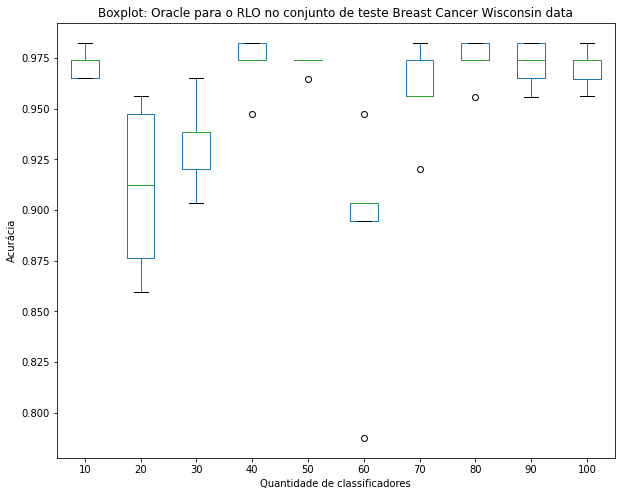

In [24]:
## avlaliando o Oracle
cria_boxplot(wdbc_rlo_oracles, 'RLO', 'Breast Cancer Wisconsin')

### Bagging

In [25]:
wdbc_bagging_L_modelos = L_modelos(BaggingClassifier, wdbc_kfolds)
print('Iniciar avaliação da cv')
wdbc_bagging_classifier_cv = avalia_L_modelos(wdbc_bagging_L_modelos, X_norm, y_cat_enc, wdbc_kfolds)
print('Iniciar avaliação dos Oracles')
wdbc_bagging_oracles = avalia_oracle(wdbc_bagging_classifier_cv, X_norm, y_cat_enc, wdbc_kfolds)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.989474,0.991228,0.991228,0.991228,0.991228,0.991228,0.992982,0.992982,0.992982,0.991228
std,0.007339,0.006203,0.006203,0.006203,0.006203,0.006203,0.007339,0.007339,0.007339,0.006203
min,0.982456,0.982456,0.982456,0.982456,0.982456,0.982456,0.982456,0.982456,0.982456,0.982456
25%,0.982456,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228
50%,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228
75%,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,1.000000,1.000000,1.000000,0.991228
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


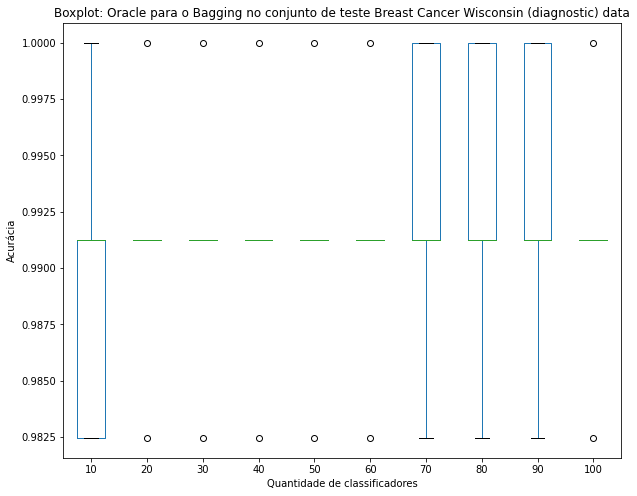

In [26]:
# criar estatísticas e boxplot
cria_boxplot(wdbc_bagging_oracles, nome_modelo='Bagging', dataset='Breast Cancer Wisconsin (diagnostic)')

### Adaboost

In [27]:
wdbc_adaboost_L_modelos = L_modelos(AdaBoostClassifier, wdbc_kfolds)
print('Iniciar avaliação da cv')
wdbc_adaboost_classifier_cv = avalia_L_modelos(wdbc_adaboost_L_modelos, X_norm, y_cat_enc, wdbc_kfolds)
print('Iniciar avaliação dos Oracles')
wdbc_adaboost_oracles = avalia_oracle(wdbc_adaboost_classifier_cv, X_norm, y_cat_enc, wdbc_kfolds)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.996491,0.998246,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.004805,0.003923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.991228,0.991228,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,0.991228,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


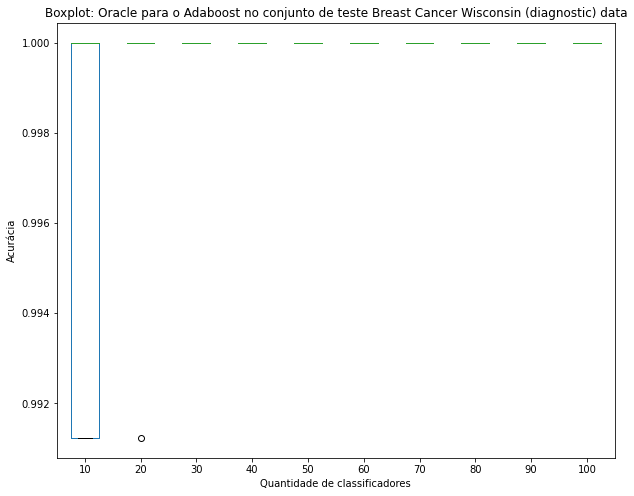

In [28]:
# criar estatísticas e boxplot
cria_boxplot(wdbc_adaboost_oracles, nome_modelo='Adaboost', dataset='Breast Cancer Wisconsin (diagnostic)')

### Random Subspace

In [29]:
wdbc_random_subspace_L_modelos = L_modelos(BaggingClassifier, wdbc_kfolds, True)
print('Iniciar avaliação da cv')
wdbc_random_subspace_classifier_cv = avalia_L_modelos(wdbc_random_subspace_L_modelos, X_norm, y_cat_enc, wdbc_kfolds)
print('Iniciar avaliação dos Oracles')
wdbc_random_subspace_oracles = avalia_oracle(wdbc_random_subspace_classifier_cv, X_norm, y_cat_enc, wdbc_kfolds, True)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.959603,0.970113,0.956109,0.952554,0.961341,0.954324,0.961357,0.959603,0.968374,0.968390
std,0.009920,0.004891,0.018553,0.018172,0.018175,0.009525,0.009930,0.013242,0.007807,0.014641
min,0.947368,0.964602,0.938596,0.921053,0.929825,0.947368,0.947368,0.947368,0.956140,0.947368
25%,0.956140,0.964912,0.938596,0.955752,0.964602,0.947368,0.956140,0.947368,0.964912,0.964912
50%,0.956140,0.973684,0.956140,0.956140,0.964912,0.947368,0.964912,0.956140,0.973451,0.964912
75%,0.964912,0.973684,0.964912,0.964912,0.973684,0.964602,0.964912,0.973451,0.973684,0.982301
max,0.973451,0.973684,0.982301,0.964912,0.973684,0.964912,0.973451,0.973684,0.973684,0.982456


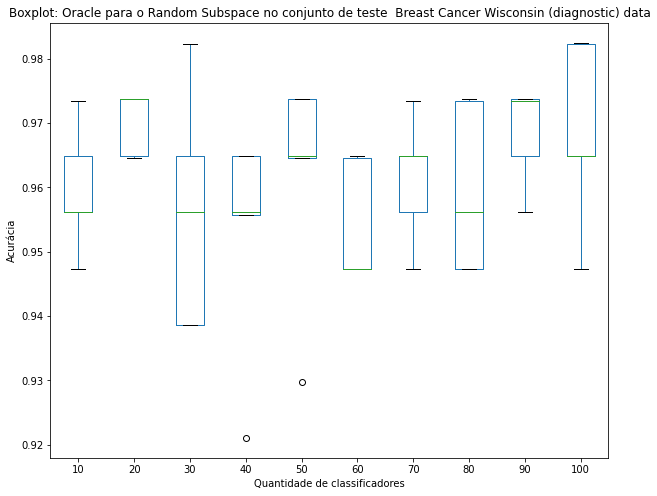

In [30]:
cria_boxplot(wdbc_random_subspace_oracles, nome_modelo='Random Subspace', dataset=' Breast Cancer Wisconsin (diagnostic)')

## DATASET N. 2: Banknote authentication Data Set

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)


In [31]:
## importação dos dados
bank = pd.read_csv('dados/data_banknote_authentication.txt', header=None)

bank.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [32]:
# separando em y e X
y = bank.iloc[:, -1].values
X = bank.iloc[:, :-1].values

# Scale the variables to have 0 mean and unit variance
scalar = StandardScaler()
X_norm = scalar.fit_transform(X)

# criando os 5-folds
bank_kfolds = cria_folds(X_norm, y)
# salvar os folds em pickle
with open('dados/bank_kfolds.pickle', 'wb') as handle:
    pickle.dump(bank_kfolds, handle, protocol=pickle.HIGHEST_PROTOCOL)

### RLO

In [33]:
## treinamento e teste para validação cruzada para RLO
bank_rlo_classificadores_resultados_treinamento, bank_rlo_classificadores_resultados_teste = RLO_L_modelos(Perceptron(), 
                                                                                                           n_classificadores, 
                                                                                                           X_norm, 
                                                                                                           y, 
                                                                                                           bank_kfolds)

print('Iniciar avaliação dos Oracles')
## avaliando os Oracles
bank_rlo_oracles = RLO_avalia_oracles(n_classificadores, bank_rlo_classificadores_resultados_teste)

Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.900141,0.932945,0.989067,0.961375,0.963559,0.981048,0.989797,0.968664,0.906713,0.869532
std,0.027162,0.012253,0.007742,0.011679,0.011791,0.012742,0.008309,0.009825,0.024907,0.021193
min,0.854015,0.919708,0.978102,0.948905,0.949091,0.963504,0.981752,0.956364,0.883212,0.835766
25%,0.901818,0.923636,0.989051,0.949091,0.952555,0.974545,0.981818,0.959854,0.883636,0.861818
50%,0.905455,0.930657,0.989091,0.967153,0.970803,0.981752,0.989051,0.974453,0.905109,0.880000
75%,0.916058,0.941818,0.989091,0.967273,0.970803,0.989091,0.996364,0.974545,0.920000,0.883212
max,0.923358,0.948905,1.000000,0.974453,0.974545,0.996350,1.000000,0.978102,0.941606,0.886861


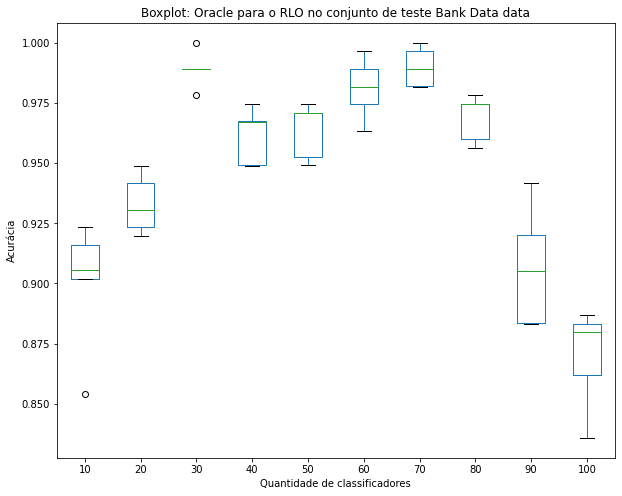

In [34]:
## avlaliando o Oracle
cria_boxplot(bank_rlo_oracles, 'RLO', 'Bank Data')

### Bagging

In [35]:
bank_bagging_L_modelos = L_modelos(BaggingClassifier, bank_kfolds)
print('Iniciar avaliação da cv')
bank_bagging_classifier_cv = avalia_L_modelos(bank_bagging_L_modelos, X_norm, y, bank_kfolds)
print('Iniciar avaliação dos Oracles')
bank_bagging_oracles = avalia_oracle(bank_bagging_classifier_cv, X_norm, y, bank_kfolds)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.991981,0.991981,0.992711,0.994166,0.992711,0.993439,0.992711,0.994171,0.992709,0.992711
std,0.004756,0.004756,0.005766,0.005538,0.005766,0.006522,0.005766,0.004151,0.006823,0.005766
min,0.985401,0.985401,0.985401,0.985401,0.985401,0.985401,0.985401,0.989091,0.985401,0.985401
25%,0.989091,0.989091,0.989091,0.992701,0.989091,0.989091,0.989091,0.992701,0.989051,0.989091
50%,0.992701,0.992701,0.992701,0.996364,0.992701,0.992701,0.992701,0.992701,0.989091,0.992701
75%,0.996350,0.996350,0.996364,0.996364,0.996364,1.000000,0.996364,0.996364,1.000000,0.996364
max,0.996364,0.996364,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


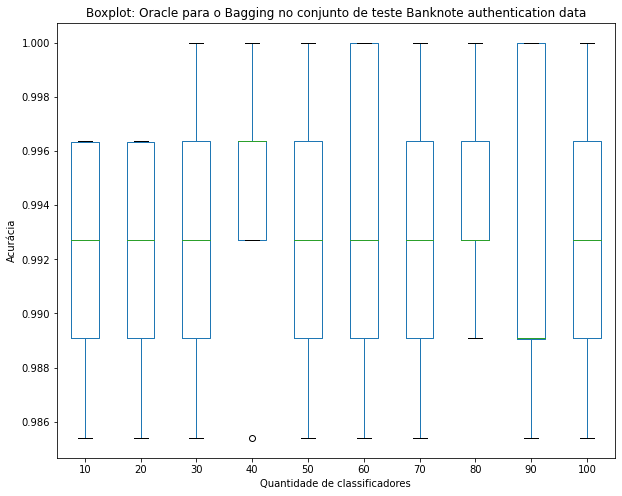

In [36]:
# criar estatísticas e boxplot
cria_boxplot(bank_bagging_oracles, nome_modelo='Bagging', dataset='Banknote authentication')

### Adaboost

In [37]:
bank_adaboost_L_modelos = L_modelos(AdaBoostClassifier, bank_kfolds)
print('Iniciar avaliação da cv')
bank_adaboost_classifier_cv = avalia_L_modelos(bank_adaboost_L_modelos, X_norm, y, bank_kfolds)
print('Iniciar avaliação dos Oracles')
bank_adaboost_oracles = avalia_oracle(bank_adaboost_classifier_cv, X_norm, y, bank_kfolds)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


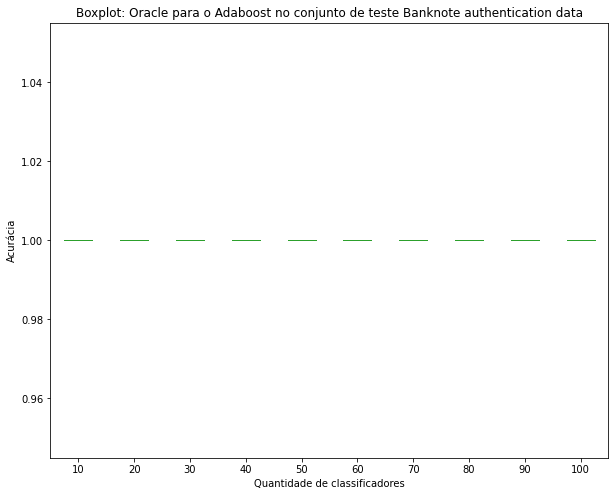

In [38]:
# criar estatísticas e boxplot
cria_boxplot(bank_adaboost_oracles, nome_modelo='Adaboost', dataset='Banknote authentication')

### Random Subspace

In [39]:
bank_random_subspace_L_modelos = L_modelos(BaggingClassifier, bank_kfolds, True)
print('Iniciar avaliação da cv')
bank_random_subspace_classifier_cv = avalia_L_modelos(bank_random_subspace_L_modelos, X_norm, y, bank_kfolds)
print('Iniciar avaliação dos Oracles')
bank_random_subspace_oracles = avalia_oracle(bank_random_subspace_classifier_cv, X_norm, y, bank_kfolds, True)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.688199,0.787156,0.747153,0.790819,0.772653,0.710068,0.656048,0.761879,0.791435,0.803092
std,0.158762,0.116064,0.159326,0.123206,0.093917,0.136001,0.135873,0.140566,0.096853,0.083571
min,0.554745,0.598540,0.563636,0.638686,0.664234,0.589091,0.572993,0.607273,0.682482,0.689781
25%,0.578182,0.752727,0.583942,0.683636,0.709091,0.618182,0.594891,0.618182,0.693431,0.770073
50%,0.589091,0.843636,0.836364,0.828467,0.756364,0.635036,0.607273,0.806569,0.840000,0.791971
75%,0.824818,0.864964,0.868613,0.894545,0.839416,0.810219,0.607273,0.875912,0.846715,0.854545
max,0.894161,0.875912,0.883212,0.908759,0.894161,0.897810,0.897810,0.901460,0.894545,0.909091


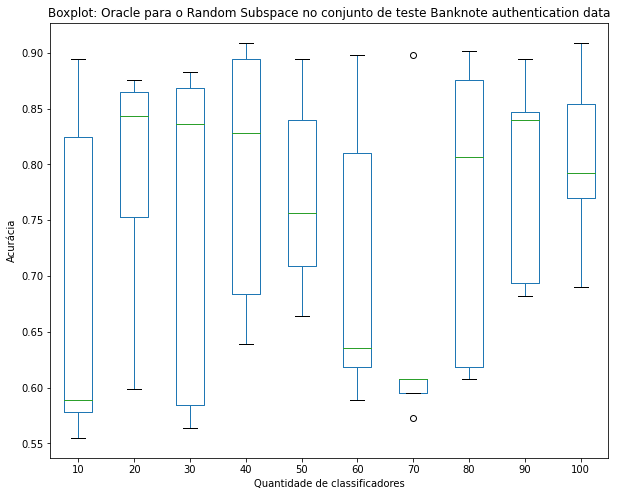

In [40]:
cria_boxplot(bank_random_subspace_oracles, nome_modelo='Random Subspace', dataset='Banknote authentication')

## DATASET N.3: Ionosphere Data Set

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.


Attribute Information:

-- All 34 are continuous
-- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.



In [41]:
ion = pd.read_csv('dados/ionosphere.data', header=None)

In [42]:
ion.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [57]:
# separando em y e X
y = ion.iloc[:, -1].values
X = ion.iloc[:, 2:-1].values

# Encoding Categorical data
encoder = LabelEncoder()
y_cat = encoder.fit_transform(y)

# criando os 5-folds
ion_kfolds = cria_folds(X, y_cat)
# salvar os folds em pickle
with open('dados/ionsphere_kfolds.pickle', 'wb') as handle:
    pickle.dump(ion_kfolds, handle, protocol=pickle.HIGHEST_PROTOCOL)

### RLO

In [61]:
## treinamento e teste para validação cruzada para RLO
ion_rlo_classificadores_resultados_treinamento, ion_rlo_classificadores_resultados_teste = RLO_L_modelos(Perceptron(), 
                                                                                                           n_classificadores, 
                                                                                                           X, 
                                                                                                           y_cat, 
                                                                                                           ion_kfolds)

print('Iniciar avaliação dos Oracles')
## avaliando os Oracles
ion_rlo_oracles = RLO_avalia_oracles(n_classificadores, ion_rlo_classificadores_resultados_teste)

Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.883099,0.828893,0.803300,0.544266,0.504185,0.763421,0.789014,0.866157,0.743541,0.811831
std,0.041143,0.092282,0.075487,0.054975,0.078456,0.063990,0.058900,0.068035,0.029036,0.045015
min,0.814286,0.728571,0.714286,0.485714,0.371429,0.685714,0.714286,0.814286,0.700000,0.757143
25%,0.885714,0.771429,0.742857,0.507042,0.500000,0.714286,0.742857,0.842857,0.728571,0.785714
50%,0.885714,0.800000,0.814286,0.542857,0.535211,0.771429,0.800000,0.842857,0.757143,0.800000
75%,0.914286,0.887324,0.845070,0.557143,0.542857,0.802817,0.842857,0.845070,0.760563,0.857143
max,0.915493,0.957143,0.900000,0.628571,0.571429,0.842857,0.845070,0.985714,0.771429,0.859155


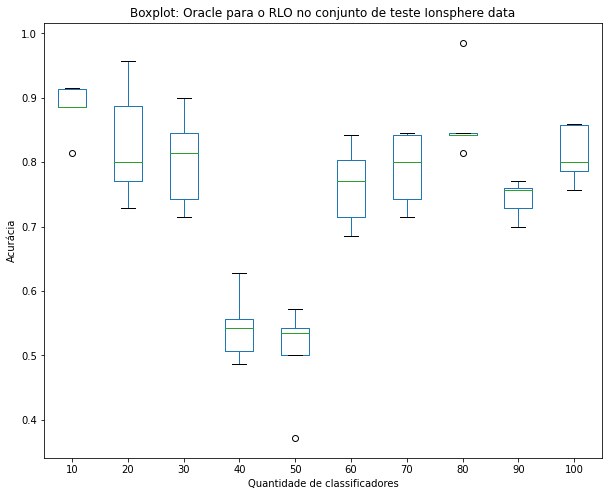

In [63]:
## avlaliando o Oracle
cria_boxplot(ion_rlo_oracles, 'RLO', 'Ionsphere')

### Bagging

In [81]:
ion_bagging_L_modelos = L_modelos(BaggingClassifier, ion_kfolds)
print('Iniciar avaliação da cv')
ion_bagging_classifier_cv = avalia_L_modelos(ion_bagging_L_modelos, X, y_cat, ion_kfolds)
print('Iniciar avaliação dos Oracles')
ion_bagging_oracles = avalia_oracle(ion_bagging_classifier_cv, X, y_cat, ion_kfolds)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.928853,0.928934,0.954487,0.963018,0.962978,0.968692,0.965755,0.971590,0.985755,0.985755
std,0.026355,0.039769,0.025305,0.021482,0.025919,0.015541,0.019219,0.017168,0.017497,0.014286
min,0.901408,0.873239,0.928571,0.942857,0.928571,0.957143,0.942857,0.943662,0.957143,0.971429
25%,0.914286,0.928571,0.929577,0.943662,0.957143,0.957143,0.957143,0.971429,0.985714,0.971429
50%,0.928571,0.928571,0.957143,0.957143,0.957746,0.957746,0.957143,0.971429,0.985915,0.985915
75%,0.928571,0.928571,0.971429,0.985714,0.971429,0.985714,0.985714,0.985714,1.000000,1.000000
max,0.971429,0.985714,0.985714,0.985714,1.000000,0.985714,0.985915,0.985714,1.000000,1.000000


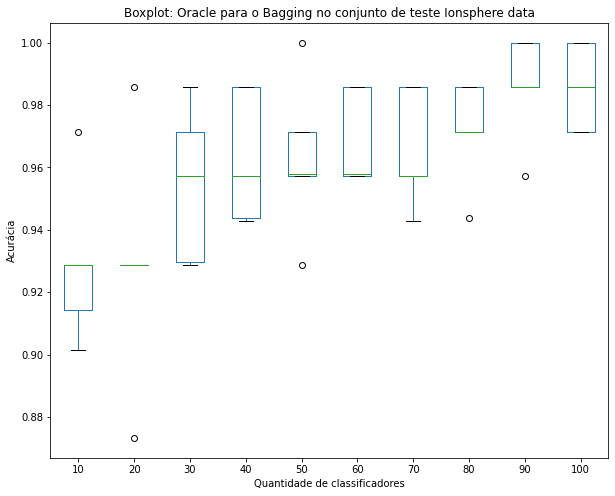

In [83]:
# criar estatísticas e boxplot
cria_boxplot(ion_bagging_oracles, nome_modelo='Bagging', dataset='Ionsphere')

### Adaboost

In [82]:
ion_adaboost_L_modelos = L_modelos(AdaBoostClassifier, ion_kfolds)
print('Iniciar avaliação da cv')
ion_adaboost_classifier_cv = avalia_L_modelos(ion_adaboost_L_modelos, X, y_cat, ion_kfolds)
print('Iniciar avaliação dos Oracles')
ion_adaboost_oracles = avalia_oracle(ion_adaboost_classifier_cv, X, y_cat, ion_kfolds)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.980241,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.036720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.915493,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,0.985714,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


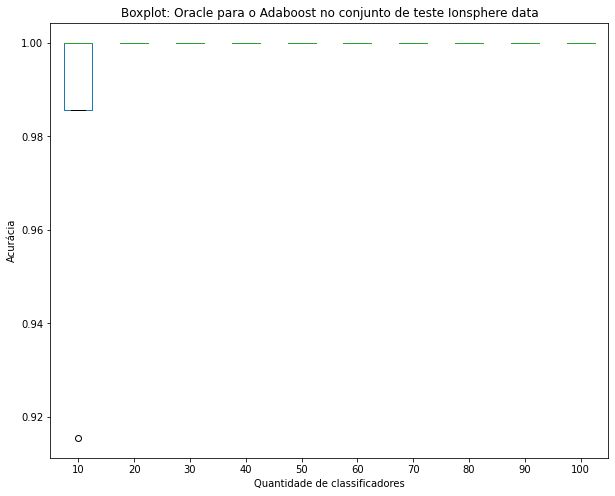

In [84]:
# criar estatísticas e boxplot
cria_boxplot(ion_adaboost_oracles, nome_modelo='Adaboost', dataset='Ionsphere')

### Random Subspace

In [85]:
ion_random_subspace_L_modelos = L_modelos(BaggingClassifier, ion_kfolds, True)
print('Iniciar avaliação da cv')
ion_random_subspace_classifier_cv = avalia_L_modelos(ion_random_subspace_L_modelos, X, y_cat, ion_kfolds)
print('Iniciar avaliação dos Oracles')
ion_random_subspace_oracles = avalia_oracle(ion_random_subspace_classifier_cv, X, y_cat, ion_kfolds, True)

Iniciar avaliação da cv
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Iniciar avaliação dos Oracles
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100
Qtd. classificadores:  10
Qtd. classificadores:  20
Qtd. classificadores:  30
Qtd. classificadores:  40
Qtd. classificadores:  50
Qtd. classificadores:  60
Qtd. classificadores:  70
Qtd. classificadores:  80
Qtd. classificadores:  90
Qtd. classificadores:  100


,10,20,30,40,50,60,70,80,90,100
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.832113,0.806519,0.826318,0.817706,0.815050,0.809296,0.780644,0.814930,0.832153,0.826358
std,0.065604,0.083805,0.061301,0.033774,0.065014,0.092835,0.068872,0.068768,0.072036,0.060241
min,0.760563,0.714286,0.771429,0.771429,0.732394,0.685714,0.700000,0.714286,0.746479,0.771429
25%,0.771429,0.718310,0.788732,0.802817,0.771429,0.746479,0.728571,0.774648,0.800000,0.774648
50%,0.842857,0.842857,0.814286,0.814286,0.814286,0.828571,0.774648,0.842857,0.828571,0.814286
75%,0.871429,0.871429,0.828571,0.842857,0.871429,0.871429,0.842857,0.871429,0.842857,0.857143
max,0.914286,0.885714,0.928571,0.857143,0.885714,0.914286,0.857143,0.871429,0.942857,0.914286


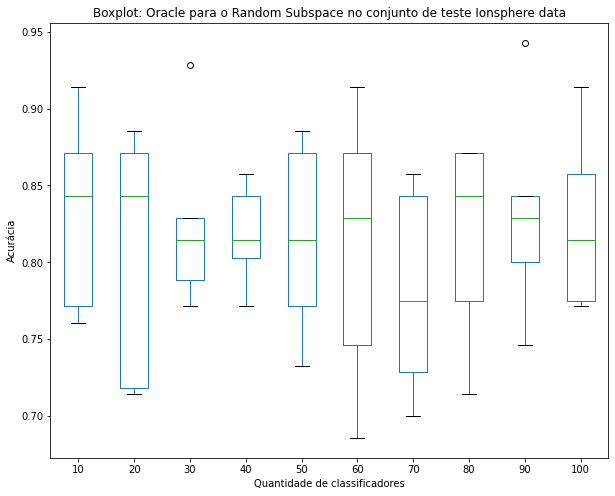

In [86]:
cria_boxplot(ion_random_subspace_oracles, nome_modelo='Random Subspace', dataset='Ionsphere')

## DATASET N.4: Climate Model Simulation Crashes Data Set

Data Set Information:

This dataset contains records of simulation crashes encountered during climate model uncertainty quantification (UQ) ensembles.

Ensemble members were constructed using a Latin hypercube method in LLNL's UQ Pipeline software system to sample the uncertainties of 18 model parameters within the Parallel Ocean Program (POP2) component of the Community Climate System Model (CCSM4).

Three separate Latin hypercube ensembles were conducted, each containing 180 ensemble members. 46 out of the 540 simulations failed for numerical reasons at combinations of parameter values.

The goal is to use classification to predict simulation outcomes (fail or succeed) from input parameter values, and to use sensitivity analysis and feature selection to determine the causes of simulation crashes.

Further details about the data and methods are given in the publication 'Failure Analysis of Parameter-Induced Simulation Crashes in Climate Models,' Geoscientific Model Development ([Web Link]).


Attribute Information:

The goal is to predict climate model simulation outcomes (column 21, fail or succeed) given scaled values of climate model input parameters (columns 3-20).

Column 1: Latin hypercube study ID (study 1 to study 3)

Column 2: simulation ID (run 1 to run 180)

Columns 3-20: values of 18 climate model parameters scaled in the interval [0, 1]

Column 21: simulation outcome (0 = failure, 1 = success)



In [87]:
clima = pd.read_csv('dados/pop_failures.dat', delimiter="\s+")

clima.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [95]:
# separando em y e X
y = clima.iloc[:, -1].values
X = clima.iloc[:, 2:-1].values

# criando os 5-folds
clima_kfolds = cria_folds(X, y)
# salvar os folds em pickle
with open('dados/clima_kfolds.pickle', 'wb') as handle:
    pickle.dump(clima_kfolds, handle, protocol=pickle.HIGHEST_PROTOCOL)


# 2)
Use as mesma bases de dados e os mesmos folds da questão anterior e, para cada base: 
- use o **SGH** para gerar o pool de classificadores no conjunto de treinamento; 

- calcule o Oracle do pool no conjunto de teste; 

- verifique quantas instâncias por classe foram incorretamente classificadas; 

- verifique quantos hiperplanos por classe foram gerados. 

Analise os resultados coletados. 

In [ ]:
import sgh

In [ ]:
sgh_mod = sgh.SGH(base_estimator=Perceptron(max_iter=1))

In [ ]:
sgh_mod.fit(X_train, y_train)
sgh_oracle = oracle.Oracle(sgh_mod)

In [ ]:
sgh_oracle.score(X_test, y_test)

In [ ]:
sgh_oracle.pool_classifiers

### Função para criar os L SGH e para Avaliar o Oracle

In [ ]:
def L_sgh_modelos(kfolds):    
    classificadores_folds = dict.fromkeys(kfolds.keys())
    for fold in kfolds:
        classificadores_folds[fold] = sgh.SGH(base_estimator = Perceptron())

    return classificadores_folds

# função para realizar a validação cruzada dos classificadores 
def avalia_L_sgh_modelos(classificadores_folds, X, y, kfolds):
    
    oracles = []
    for fold, (train_idx, test_idx) in kfolds.items():
        # treinamento e teste
        classificadores_folds[fold].fit(X[train_idx], y[train_idx])

        # Oracle
        oracle_i = oracle.Oracle(classificadores_folds[fold]) 
        oracle_score = oracle_i.score(X[test_idx], y[test_idx])
        oracles.append(oracle_score)
        
    return oracles
    

In [ ]:
l_sgh_modelos = L_sgh_modelos(kfolds)
oracles_sgh_scores = avalia_L_sgh_modelos(l_sgh_modelos, X_train, y_train, kfolds)

In [ ]:
l_sgh_modelos

In [ ]:
print(f'Média:         {np.mean(oracles_sgh_scores)}')
print(f'Desvio padrão: {np.std(oracles_sgh_scores, ddof=1)}')